In [ ]:
# MIT License

# Practicas 1: Regresão Linear
## House Prices - Advanced Regression Techniques

Peça a um comprador de imóvel residencial para descrever a casa dos seus sonhos, e provavelmente não começará com a altura do teto do porão ou a proximidade de uma ferrovia leste-oeste. Mas o conjunto de dados dessa competição de playground prova que influencia muito mais as negociações de preços do que o número de quartos ou uma cerca branca.
Com 79 variáveis ​​explicativas que descrevem (quase) todos os aspectos das casas residenciais em Ames, Iowa, esta competição desafia você a prever o preço final de cada casa.

Neste desafio de kaggle sua função é prever o preço de venda de cada casa. Para cada Id no conjunto de teste, você deve prever o valor da variável SalePrice. 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview 


## Objetivos do aprendizado:
Depois de fazer este Colab, você saberá como:
* Trabalhar com modelos de regressão linear
* Implementar o método de gradiente descendente em uma dimensão 
* Implementar uma equação fechada empregando a Equação Normal em uma dimensão
* Treinar um modelo de regressão linear empregando sklearn
* Treinar um modelo de regressão linear empregando Pytorch (Optional)
* Realizar um submission em Kaggle


In [2]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/pedrodiamel/dl-mini-course/blob/main/books/class_03_linear_regression_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

## Datasets

Baixe os dados da competição deste site: [Kaggle: House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [ ]:
# kaggle competitions download -c house-prices-advanced-regression-techniques

## Configuração do ambiente
O seguinte codigo importa os modulos necessários

In [ ]:
# Load the imports

# This Python 3 environment comes with many helpful analytics libraries installed

import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns  # visualization tool
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
sns.set()

[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]

## Analisis e exploração dos dados (EDA)
*Lembrar: Precisa carregar o house-prices-advanced-regression-techniques.zip na raiz do projeto*

In [ ]:
!unzip -n house-prices-advanced-regression-techniques.zip -d house

for dirname, _, filenames in os.walk('./house'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Archive:  house-prices-advanced-regression-techniques.zip
./house/train.csv
./house/data_description.txt
./house/test.csv
./house/sample_submission.csv


In [ ]:
# Passo 1
# Carrega os dados do dataset house-prices-advanced-regression empregando pandas (pd)
# link: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
### COMENZAR O CODIGO AQUI ### 
train_data = pd.read_csv("./house/train.csv") # ???
### TERMINA AQUI ###

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Explorando os dados de teste 
# Lembrando que os dados de teste de kaggle não possuem o atributo SalePrice (label para o problema de regressão)
test_data = pd.read_csv("./house/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Explorano os dados de submisão para kaggle
submission = pd.read_csv('./house/sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### Descripção das caracteristicas
---

In [ ]:
train_data.columns

* **SalePrice** - o preço de venda da propriedade em dólares. Esta é a variável de destino que você está tentando prever.
* **MSSubClass** : a classe de construção
* **MSZoning** : A classificação geral de zoneamento
* **LotFrontage** : metros lineares da rua conectada à propriedade
* **LotArea** : tamanho do lote em pés quadrados
* **Street** : Tipo de acesso rodoviário
* **Alley** : Tipo de acesso ao beco
* **LotShape** : forma geral da propriedade
* **LandContour** : Nivelamento da propriedade
* **Utilities** : tipos de utilitários disponíveis
* **LotConfig** : configuração do lote
* **LandSlope** : declive da propriedade
* **Neighborhood** : localizações físicas dentro dos limites da cidade de Ames
* **Condition1** : Proximidade com a estrada principal ou ferrovia
* **Condition2** : Proximidade com a estrada principal ou ferrovia (se houver uma segunda)
* **BldgType** : Tipo de habitação
* ...

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data 

In [ ]:
# Imprime informação das features presentes no conjunto de trenamento
train_data.info()

### Dados faltantes (missing value)

In [ ]:
# Visualize os dados faltantes no conjunto de trenamento
msno.matrix(train_data)
plt.show()

### Análise da correlação entre as features

In [ ]:
# Passo 2
# Seleção as feature {'SalePrice', 'GrLivArea', 'LotArea', 'GarageArea', 
# 'PoolArea', 'YearBuilt'} e visualize a matriz de correlação
# link: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr

### COMENZAR O CODIGO AQUI ### 
fearutes = ['SalePrice', 'GrLivArea', 'LotArea', 'GarageArea', 'PoolArea', 'YearBuilt'] # ???
corrmat = train_data[fearutes].corr() # ???
### TERMINA AQUI ###

plt.figure(figsize=(8,8))
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

### Análise da relação entre SalePrice e GrLivArea e seu comportamento com respeito ou tempo de construção (YearBuilt)

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=train_data[fearutes], x="GrLivArea", y="SalePrice", hue="YearBuilt")
plt.show()

## Regressão linear

Neste ponto vamos fazer a implementação de nosso primeiro regresso linear baseado na equação normal. Pare isso empregaremos a seguinte formulação matemática: 

Função de custo:

$$J(\theta) = ||y-X\theta||^2$$

Problema de optimização:

$$\min_{\theta} J(\theta) $$

Solução:

$$\theta = (X^TX)^{-1}X^Ty$$

Predição empregando o modelo obtido $\theta$:

$$ \hat{y} = h_{\theta}(x) = \theta_0 + \theta_1x $$

In [ ]:

class NormalEquationRegression():
  def __init__(self):
    self.theta = [0, 0]
  def fit(self, x, y):
    # Add 1 na frente x = [1 x]
    x = np.hstack((np.ones((x.shape[0],1)), x))
    # Passo 3
    # Implemente a estimação do parâmetro \theta baseado na solução da Ecuação 
    # Normal
    # \theta = (X^TX)^{-1}X^Ty
    ### COMENZAR O CODIGO AQUI ### 
    self.theta = (np.linalg.pinv(x.T@x)@x.T)@y # ???
    ### TERMINA AQUI ###

  def predict(self, x):
    # Passo 4
    # Faça a predição empregando o modelo obtido \theta
    ### COMENZAR O CODIGO AQUI ###
    y_hat = x*self.theta[1] + self.theta[0] # ???
    ### TERMINA AQUI ###
    return y_hat


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleção da feature a ser estimada
# Lembrem-se que queremos predecir o valor das casas
y = train_data["SalePrice"]

# Selecção das features
# Neste caso estamos trabalhando com uma única variável. Recomendamos empregar a 
# feature GrLivArea para fazer a sua predição. 
features = ["GrLivArea"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Divisão do conjunto em treinamento e validação
# Seleccione o procentagem para o conjunto de validação
tamanho_val = 0.3
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

# Criação dos modelos de regressão linear
# Passo 5
# Cree uma instância da classe NormalEquationRegression
### COMENZAR O CODIGO AQUI ###
model = NormalEquationRegression()
### TERMINA AQUI ###

# Treinamento do modelo de regressão linear
# Passo 6
# Empregando a função fit treine o modelo regressão linear
### COMENZAR O CODIGO AQUI ###
model.fit(X_train, y_train) # ???
### TERMINA AQUI ###

# Imprimir os valores do modelo \theta
print("Theta: ", model.theta)

# Predição no conjunto de validação
preditions_val = model.predict(X_val)

# Avaliação dos resultados
# The mean squared error
print("RMSE: {0}".format(mean_squared_error(y_val, preditions_val, squared=False)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, preditions_val))

In [ ]:
print('y = {0} + {1} X'.format(model.theta[0], model.theta[1]))

In [ ]:
# Visualização dos resultados obtidos
x_axis = np.arange(0, 5000, 10)
f_x = model.theta[0] + model.theta[1] * x_axis

plt.figure(figsize=(12, 9))
plt.scatter(X_train, y_train,  color='blue')
plt.plot(x_axis, f_x,  color='red')
plt.show()

## Regressão empregando gradiente descendente (GD)

Agora vamos fazer uma implementação de um regresso linear baseado no descenso do gradiente. Pare isso empregaremos a seguinte formulação matemática:

Função de custo:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m ( h_{\theta}(x^i) - y^i )^2 $$

Problema de optimização:

$$\min_{\theta} J(\theta) $$

Solução:

$$\theta^{t} = \theta^{t-1} - \alpha  \frac{\partial}{\partial \theta} J  $$
onde
$$ \frac{\partial}{\partial \theta} J =  \frac{1}{m} \sum_{i=1}^m ( h_{\theta}(x^i) - y^i )x^i$$

Predição empregando o modelo obtido $\theta$:

$$ \hat{y} = h_{\theta}(x) = \theta_0 + \theta_1x $$

In [ ]:
class GDRegression():
  def __init__(self):
    self.theta = [0, 0]
    self.num_iter = 10000
    self.alpha = 0.001
    self.J = []

  def fit(self, x, y):

    x = np.hstack( (np.ones((x.shape[0],1)), x) )
    y = y.to_numpy()[:,np.newaxis]
    m = len(y)
    self.theta = np.zeros((2,1))

    J = (1/(2*m))*np.sum( (x@self.theta-y)**2 )
    print(J)

    J_hist = []
    theta = self.theta
    for i in range(self.num_iter):
      
      h = x@theta

      # Passo 7:
      # Seleções qual das seguintes opções são correta e complete o código
      # a) theta = theta - (self.alpha*(1/m)*np.sum((np.tile(h-y,(1,2)))*x, axis=0)[:, np.newaxis])
      # b) theta[0] = theta[0] - self.alpha*(1/m)*sum((h-y)*x[:,0][:,np.newaxis])
      #    theta[1] = theta[1] - self.alpha*(1/m)*sum((h-y)*x[:,1][:,np.newaxis])
      #
      ### COMENZAR O CODIGO AQUI ###
      theta = theta - (self.alpha*(1/m)*np.sum((np.tile(h-y,(1,2)))*x, axis=0)[:, np.newaxis]) # ???      
      #theta[0] = theta[0] - self.alpha*(1/m)*sum((h-y)*x[:,0][:,np.newaxis])
      #theta[1] = theta[1] - self.alpha*(1/m)*sum((h-y)*x[:,1][:,np.newaxis])
      ### TERMINA AQUI ###
 
      J = (1/(2*m))*np.sum( (x@theta-y)**2 )
      
      if i % 1000 == 0: 
        print(J)

      J_hist.append(J)

    self.theta = theta
    self.J = J_hist

  def predict(self, x):
    # Passo 8
    # Faça a predição empregando o modelo obtido \theta
    ### COMENZAR O CODIGO AQUI ###
    y_hat = x*self.theta[1] + self.theta[0] # ???
    ### TERMINA AQUI ###
    return y_hat

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleção da feature a ser estimada
# Lembrem-se que queremos predecir o valor das casas
y = train_data["SalePrice"]

# Selecção das features
# Neste caso estamos trabalhando com uma única variável. Recomendamos empregar a 
# feature GrLivArea para fazer a sua predição. 
features = ["GrLivArea"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Escale os valores da feature selecionada 
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Divisão do conjunto em treinamento e validação
# Seleccione o procentagem para o conjunto de validação
tamanho_val = 0.3
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

# Criação dos modelos de regressão linear
model = GDRegression()

# Treinamento do modelo de regressão linear
model.fit(X_train, y_train)

# Imprimir os valores do modelo \theta
print("Theta: ", model.theta)

# Predição no conjunto de validação
preditions_val = model.predict(X_val)

# Avaliação dos resultados
# The mean squared error
print("RMSE: {0}".format(mean_squared_error(y_val, preditions_val, squared=False)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, preditions_val))

In [ ]:
print('y = {0} + {1} X'.format(model.theta[0], model.theta[1]))

In [ ]:
# Visualização da função de custo
plt.plot(model.J)
plt.plot()

In [ ]:
# Visualização dos resultados obtidos
x_axis = np.arange(-4.0, 10, 0.10)
f_x = model.theta[0] + model.theta[1] * x_axis

x = X_train.to_numpy()

plt.figure(figsize=(12, 9))
plt.scatter(x, y_train,  color='blue')
plt.plot(x_axis, f_x,  color='red')
plt.show()

## Agora vamos empregar os métodos de regressão linear da sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Seleção da feature a ser estimada
# Lembrem-se que queremos predecir o valor das casas
y = train_data["SalePrice"]

# Selecção das features
# Neste caso estamos trabalhando com uma única variável. Recomendamos empregar a 
# feature GrLivArea para fazer a sua predição.
features = ["GrLivArea"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Divisão do conjunto em treinamento e validação
# Seleccione o procentagem para o conjunto de validação
tamanho_val = 0.3
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.30, shuffle=True, random_state=0)

# Criação dos modelos de regressão linear
# Passo 9
# Cree uma instância da classe LinearRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
### COMENZAR O CODIGO AQUI ###
model = LinearRegression() # ???
### TERMINA AQUI ###

# Treinamento do modelo de regressão linear
# Passo 10
# Empregando a função fit treine o modelo regressão linear
### COMENZAR O CODIGO AQUI ###
model.fit(X_train, y_train) # ???
### TERMINA AQUI ###

# Predição no conjunto de validação
preditions_val = model.predict(X_val)

# Avaliação dos resultados
# The mean squared error
print("RMSE: {0}".format(mean_squared_error(y_val, preditions_val, squared=False)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_val, preditions_val))


RMSE: 61061.102118698866
Variance score: 0.45


In [ ]:
print('y = {0} + {1} X'.format(model.intercept_, model.coef_[0]))

y = 13998.441163741954 + 109.44329072279999 X


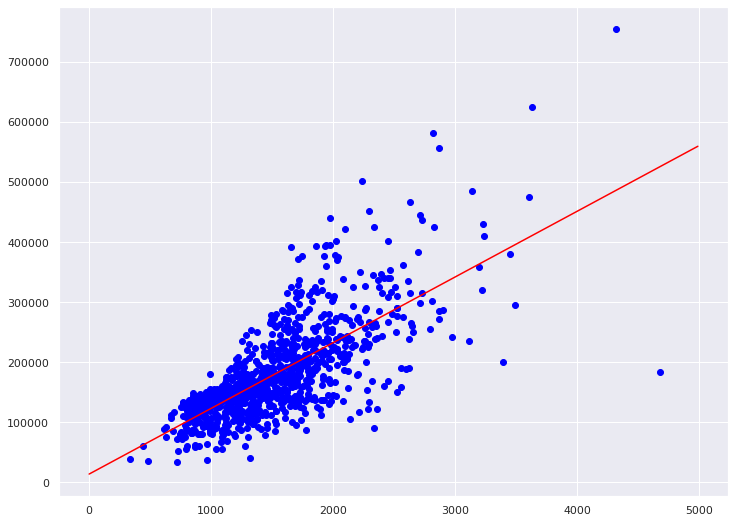

In [ ]:
# Visualização dos resultados obtidos
x_axis = np.arange(0, 5000, 10)
f_x = model.intercept_ + model.coef_[0] * x_axis

plt.figure(figsize=(12, 9))
plt.scatter(X_train, y_train,  color='blue')
plt.plot(x_axis, f_x,  color='red')
plt.show()

## Bora a melhor o resultados
Voce pode modificar o passo 9 para tentar melhorar :)
* Tenta empregar o método de regressão da sklearn como SGDRegressor 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html 
* Tenta empregar alguma outra feature (Que análisis de dados poderia fornecer algum insight para melhorar o regressor)
 
 

## Submeter teu resultado em Kaggle
Apresentar seu resultado na plataforma kaggle é muito fácil, você pode gerar um arquivo .csv e submeter no kaggle. Esperamos que você continue trabalhando para melhorar seu resultado no leaderboard e compartilhe com todos nós. Ficaremos muito feliz :D!!!

In [ ]:
# Submission
predictions = model.predict(X_test)
output = pd.DataFrame({'Id': test_data["Id"], 'SalePrice': predictions })
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

## Bora empregar um dos melhores frameworks de deep learning !!!
Implementando Regressão Linear em [PyTorch](https://pytorch.org/)


In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.10.0+cu111
True


In [ ]:
# Numpy to pytorch
# https://pytorch.org/docs/stable/generated/torch.from_numpy.html 
X_train_tensor = torch.from_numpy(X_train.to_numpy()).float()
y_train_tensor = torch.from_numpy(y_train.to_numpy()).float()
X_val_tensor   = torch.from_numpy(X_val.to_numpy()).float()
y_val_tensor   = torch.from_numpy(y_val.to_numpy()).float()
X_test_tensor  = torch.from_numpy(X_test.to_numpy()).float()

print(X_train_tensor.__class__, X_train_tensor.shape)

<class 'torch.Tensor'> torch.Size([1022, 1])


In [ ]:
# Scalando a entrada 
def norm_scaling(x):
  return (x - x.min()) / (x.max() - x.min())

X_train_tensor  = norm_scaling(X_train_tensor)
X_val_tensor    = norm_scaling(X_val_tensor)
X_test_tensor   = norm_scaling(X_test_tensor)

print(X_train_tensor.min(), X_train_tensor.max())

tensor(0.) tensor(1.)


### Definição de um modelo linal em pytorch (modelo de neurônio)
$$ \hat{y} = h_{\theta}(x) = \theta_0 + \theta_1x = X\Theta$$

In [ ]:
model = torch.nn.Sequential(
    # https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
    torch.nn.Linear(1, 1), # Linear layes ->  X*\Theta
    torch.nn.Flatten(0, 1) # Reduce a dimenção da saida shape [N,]
)
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Flatten(start_dim=0, end_dim=1)
)

### Função de custo tambem conhosida como MSE:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m ( h_{\theta}(x^i) - y^i )^2 $$

In [ ]:
# Empregamos a função MSE de pytorch
# https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html
Jmse = torch.nn.MSELoss(reduction='mean')

### Trenamento do modelo

Problema de optimização:

$$\min_{\theta} J(\theta) $$

Solução:

$$\theta^{t} = \theta^{t-1} - \alpha  \frac{\partial}{\partial \theta} J  $$
onde
$$ \frac{\partial}{\partial \theta} J =  \frac{1}{m} \sum_{i=1}^m ( h_{\theta}(x^i) - y^i )x^i$$

In [ ]:
learning_rate = 1e-3
iter_num = 100000

J_hist = []
for t in range(iter_num):

  y_pred = model(X_train_tensor)
  J = Jmse(y_pred, y_train_tensor)
  
  J_hist.append(J.item())
  if t % 10000 == 0:
    print(t, J.item())

  model.zero_grad()
  J.backward() # calculo da derivada

  with torch.no_grad():
    for theta in model.parameters():
      theta -= learning_rate * theta.grad # atualização dos pesos \theta


0 38711349248.0
10000 4429231104.0
20000 3798132224.0
30000 3426011136.0
40000 3206596608.0
50000 3077220608.0
60000 3000938752.0
70000 2955960320.0
80000 2929436672.0
90000 2913794304.0


[]

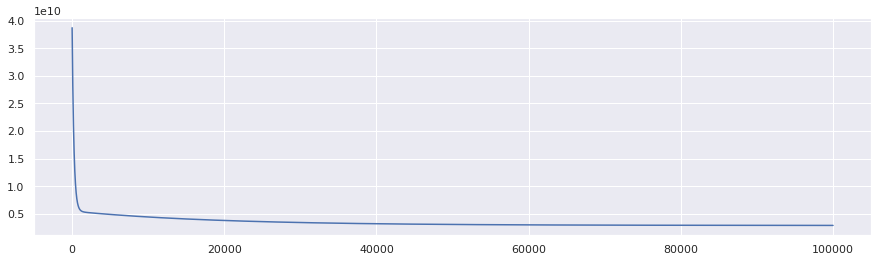

In [ ]:
# Visualização da função de custo
plt.plot(J_hist)
plt.plot()

In [ ]:
linear_layer = model[0] # X\Theta
print('y = {0} + {1} X'.format(linear_layer.bias.item(), linear_layer.weight[:, 0].item()))

y = 59021.5234375 + 444663.09375 X


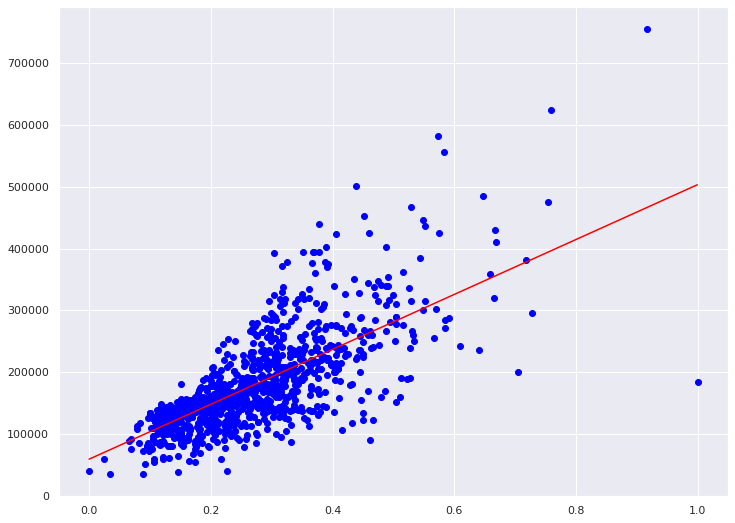

In [ ]:
# Visualização dos resultados obtidos
x_axis = np.arange(0.0, 1.0, 0.001)
f_x = linear_layer.bias.item() + linear_layer.weight[:, 0].item() * x_axis

plt.figure(figsize=(12, 9))
plt.scatter(X_train_tensor, y_train,  color='blue')
plt.plot(x_axis, f_x,  color='red')
plt.show()